# 숨바꼭질
---
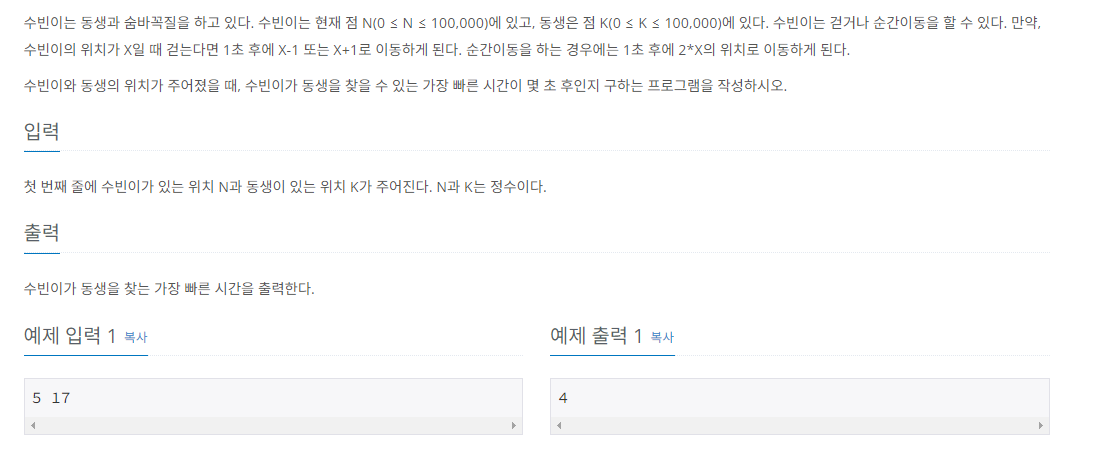

## 풀이
* 시간 제한 2초 : 계산량 대충 4000만 정도
* 메모리 제한 128MB
* 최단거리 : BFS
    * BFS
        * 구현 방법 : queue
* 16 : 5-10-9-8-16 = 4
* 17 : 5-10-9-18-17 = 4 
* 15 : 5-4-8-16-15 = 4
* 20 : 5-10-20 = 2
* 30 : 5-4-8-16-32-31-30 = 6

In [26]:
from collections import deque
N, K = map(int, input().split())
queue = deque()
queue.append((N-1, 0))
graph = [[0 for _ in range(2*N)] for _ in range(N)]
for i in range(N):
    for j in range(2*N):
        if j >= N-N//2 and j <= N+N//2:
            graph[i][j] = 1
answer_x= K%(2*N)-1
answer_y= K//(2*N)
move_sequence = [(-1,0), (1, 0), (0,1), (0,-1)] # 좌우 상하로 이동.
total_num = [[0 for _ in range(2*N)] for _ in range(N)]
total_num[0][N-1] =1
while queue:
    x, y = queue.popleft()
    condition = x < 0 or y < 0 or x >=2*N or y >= N
    # 상정된 범위 내라면
    if condition: 
        continue
    if graph[y][x] == 1:
        graph[y][x] =0
        # 다음에 길이 연결되어 있으면 진행
        for i in range(4):
            nx, ny = x + move_sequence[i][0], y+ move_sequence[i][1]
            if nx < 0 or ny < 0 or nx>= 2*N or ny >= N:
                continue
            if graph[ny][nx] == 1: # 다음에 갈 수 있으면
                total_num[ny][nx] = total_num[y][x] +1
                queue.append((nx, ny))
print(total_num[answer_y][answer_x])

4


In [24]:
total_num

[[0, 0, 0, 2, 1, 2, 3, 4, 0, 0],
 [0, 0, 0, 3, 2, 3, 4, 5, 0, 0],
 [0, 0, 0, 4, 3, 4, 5, 6, 0, 0],
 [0, 0, 0, 5, 4, 5, 6, 7, 0, 0],
 [0, 0, 0, 6, 5, 6, 7, 8, 0, 0]]

In [ ]:
from collections import deque
start, target = map(int, input().split())
graph= [0 for _ in range(start+target)]
queue = deque() # 초기 위치 넣기
queue.append(start)
while queue:
    x = queue.popleft()
    if x <0 or x>=start+target: # 이상한 판인 경우.
        continue
    for i in range(3):
        if i ==0:
            nx = x+1
        elif i ==1:
            nx = x-1
        elif i == 2:
            nx = x*2
        if nx < 0 or nx>= start+target:
            continue
        if graph[nx]== 0:
            graph[nx] = graph[x] + 1
            queue.append(nx)
print(graph[target])